In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import time

# Travel Salesman Problem (TSP)


Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?

<img src="img/TSP.png" width="400">

### Application of TSP:
1. Logistic
2. Microchips manufacturing (cities are soldering points)
3. Astronomy
***
Also, one could add some constraints and obtain more specific problem. For example:
- time window in which city should be visited (tourist routes)
- time window and time of providing service (cleaning service)

And even more modifications

## Mathematical formulation
Given a complete weighted graph, find a Hamiltonian cycle with the least weight.

Here nodes represent cities and weights of the edges represent disctance.

## Solution of TSP problem
### Exact algorithms

- Brute-forse search provide an exact solution for $O(n!)$ steps. Approach is impractical even for small number of cities (n = 15).
- Heald-Karp algorithm. $O(n^22^n)$ steps reqired.

### Heuristics:
- Nearest neighbour algorithm. Solution depands on the choice of initial node
- Pairwaice exchange. Inexact solution

In [2]:
def get_path_dist(cities, graph):
    """
    calculate distance of given route
    """
    distance = 0
    i = cities[0]
    for j in cities[1:]:
        distance += graph[i,j]
        i = j
    j = cities[0]
    return distance + graph[i,j]



def naive_TSP_solution(graph):
    """
    return the order of cities
    """
    k = len(graph)
    best_route = np.arange(k - 1) + 1
    min_dist = get_path_dist(best_route, graph)
    
    routes = np.array(list(it.permutations(np.arange(k - 1)) ) ) + 1
    
    for r in routes:
        route = np.insert(r, 0, 0)
        dist = get_path_dist(route, graph)
        if dist < min_dist:
            min_dist = dist
            best_route = route 
#         if dist == min_dist:
#             print('another solution is\n', route, dist)

    return best_route, min_dist

In [3]:
# define distance between 12 UK cities
# data was found here https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html

cities_graph = np.array([
    [0, 300, 352, 466, 217, 238, 431, 336, 451, 47, 415, 515],
    [300, 0, 638, 180, 595, 190, 138, 271, 229, 236, 214, 393],
    [352, 638, 0, 251, 88, 401, 189, 386, 565, 206, 292, 349],
    [466, 180, 251, 0, 139, 371, 169, 316, 180, 284, 206, 198],
    [217, 595, 88, 139, 0, 310, 211, 295, 474, 130, 133, 165],
    [238, 190, 401, 371, 310, 0, 202, 122, 378, 157, 362, 542],
    [431, 138, 189, 169, 211, 202, 0, 183, 67, 268, 117, 369],
    [336, 271, 386, 316, 295, 122, 183, 0, 483, 155, 448, 108],
    [451, 229, 565, 180, 474, 378, 67, 483, 0, 299, 246, 418],
    [47, 236, 206, 284, 130, 157, 268, 155, 299, 0, 202, 327],
    [415, 214, 292, 206, 133, 362, 117, 448, 246, 202, 0, 394],
    [515, 393, 349, 198, 165, 542, 368, 108, 418, 327, 394, 0]])

Gr = cities_graph

In [5]:
# solve the problem
# best_route, min_dist = naive_TSP_solution(cities_graph)
# solution was obtained via google collab servise. It was done for 15 minutes
best_route = np.array([0, 5, 7, 11, 3, 1, 8, 6, 10, 4, 2, 9])
min_dist = 1733

## Hopfieild Network for TSP

Hamiltonian of the system to solve TSP

$$
    H = A \sum_v{\big(1-\sum_j {x_{v,j}}\big)^2} 
    + A\sum_j{\big(1 - \sum_v{x_{v,j}}\big)^2} 
    + A \sum_{(uv)\notin E}{\sum_j}{x_{u,j}x_{v,j+1}} \\
    + B \sum_{(uv)\in E}{}W_{uv}\sum_j{x_{u,j}x_{v,j+1}}
$$

$H_B$ should be small enough to not violate the constraints
$$0 < B\max{(W_{uv})} < A$$

In the present realisation the following updating technique was used:

$$
    u_{v,j}(t+\Delta t) = u_{v,j}(t) + \Delta t \bigg(-u_{v,j}(t) - 2A(1 - \sum_j x_{v,j}) \\- 2A(1 - \sum_v x_{v,j})
    + B\sum_u W_{u,v}x_{u,j-1}\bigg)
$$
$$
    x_{v,j} =  \frac{1}{2}\big(1 + tanh(\frac{u_{v,j}}{T})\big)
$$

We will solve problem for 12 UK cities. Dataset was found here https://people.sc.fsu.edu/~jburkardt/datasets/cities/cities.html

In [6]:
print('distance between cities\n',np.round(Gr,2), '\n')
print('minimal distance =', np.round(min_dist, 5))
print('best route is', best_route)

distance between cities
 [[  0 300 352 466 217 238 431 336 451  47 415 515]
 [300   0 638 180 595 190 138 271 229 236 214 393]
 [352 638   0 251  88 401 189 386 565 206 292 349]
 [466 180 251   0 139 371 169 316 180 284 206 198]
 [217 595  88 139   0 310 211 295 474 130 133 165]
 [238 190 401 371 310   0 202 122 378 157 362 542]
 [431 138 189 169 211 202   0 183  67 268 117 369]
 [336 271 386 316 295 122 183   0 483 155 448 108]
 [451 229 565 180 474 378  67 483   0 299 246 418]
 [ 47 236 206 284 130 157 268 155 299   0 202 327]
 [415 214 292 206 133 362 117 448 246 202   0 394]
 [515 393 349 198 165 542 368 108 418 327 394   0]] 

minimal distance = 1733
best route is [ 0  5  7 11  3  1  8  6 10  4  2  9]


In [7]:
def get_energy_tsp(graph, out, A, B):
    """
    calculate energy of TSP hamiltonian (H_A + H_B)
    """
    k = len(out)
    ind = np.where(np.sign(graph) - 1 < 0)
    
    H_A3 = 0
    for i in range(k):
        for j in range(k):
            if graph[i,j] == 0:
                H_A3 += out[i] @ np.roll(out[j], -1)
    
    H_A = A * ((1 - out.sum(axis = 0))**2).sum() \
        + A * ((1 - out.sum(axis = 1))**2).sum() \
        + H_A3 #A * np.sum( out[ind[0]] * np.roll(out[ind[1]], -1) )
    
    H_B = 0
    for i in range(k):
        for j in range(k):
            H_B += graph[i,j] * (out[i] @ np.roll(out[j], -1))
            
    return H_A + B * H_B

In [8]:
def update_state_TSP(graph, state, out, A, B, T = 1):
    """
    evolution of HNN
    """
    k = len(out)
    
    for i in range(5 * k**2):
        i,j = np.random.randint(k, size=2)
        ind = np.where(np.sign(graph) - 1 < 0)
                
        du_ij = 2 * A * (1 - out[i].sum()) \
             + 2 * A * (1 - out[:,j].sum()) \
             - B * graph[:, i] @ out[:, j-1 % k]# \
            # - state[i,j] # - A * out[ind[0], j - 1 % k].sum()

        state[i,j] = state[i,j] + du_ij * 0.0001
        out[i,j] = (0.5*(1 + np.tanh(state[i,j]/T)))

    return state, out


def update_state_TSP_seq(graph, state, out, A, B, T = 1):
    k = len(state)
#     i,j = np.random.randint(k, size=2)
    for i in range(5):
        ind = np.where(np.sign(graph) - 1 < 0)
        for i in range(k):
            for j in range(k):
                du_ij = 2 * A * (1 - out[i].sum()) \
                        + 2 * A * (1 - out[:,j].sum()) \
                        - B * graph[:, i] @ out[:, j-1 % k] \
                        - state[i,j] #- A * out[ind[0], j - 1 % k].sum()

                state[i,j] = state[i,j] + du_ij * 0.00001
                out[i,j] = (0.5*(1 + np.tanh(state[i,j]/T)))
#     print('gradient =', du_ij)
            
    return state, out


def update_state_TSP_noise(graph, state, out, A, B, T = 1, noise = 0.1):
    k = len(out)
    i,j = np.random.randint(k, size=2)
    ind = np.where(np.sign(graph) - 1 < 0)

    du_ij = 2 * A * (1 - out[i].sum()) \
         + 2 * A * (1 - out[:,j].sum()) \
         - A * out[ind[0], j - 1 % k].sum() \
         - B * graph[:, i] @ out[:, j-1 % k] \
         + np.random.rand() * noise
    
    state[i,j] = state[i,j] + du_ij * 0.001
    out[i,j] = (0.5*(1 + np.tanh(state[i,j]/T)))
            
    return state, out

In [9]:
def optimize_t(graph, state, out, energy, A, B, T, N):
    for i in range(N):
        state, out = update_state_TSP(graph, state, out, A, B, T)
        energy.append(get_energy_tsp(graph, out, A, B))
    
    return state, out, energy, T, N


def optimize_noise(graph, state, out, energy, A, B, T, N, noise):
    for i in range(N):
        state, out = update_state_TSP_noise(graph, state, out, A, B, T, noise)
        energy.append(get_energy_tsp(graph, out, A, B))
    
    return state, out, energy, T, N

def optimize_seq(graph, state, out, energy, A, B, T, N):
    for i in range(N):
        state, out = update_state_TSP_seq(graph, state, out, A, B, T)
        energy.append(get_energy_tsp(graph, out, A, B))
    
    return state, out, energy, T, N

In [10]:
np.random.seed(10)
k = len(cities_graph)    
Gr = cities_graph

B = 100
A = np.max(cities_graph) * 3 * B


energy = []
N = k**2*2
S_list = []
# S = np.random.choice([0.,1.], size=(k,k))
# state = np.random.rand(k,k) * 10 * np.random.choice([-1,1], size=(k,k))

for i in range(50):
    print(i)
    t0 = time.time()
    S = np.random.choice([0.,1.], size=(k,k))
    state = np.random.rand(k,k) * 10 * np.random.choice([-1,1], size=(k,k))
    T = 300
    energy_list = []
    for j in range(12):
        state, S, energy_list, T, N = optimize_seq(cities_graph, state, S, energy_list, A, B, T, N)
        T *= 0.85
    S_list.append(S)
    energy.append(energy_list)
    t1 = time.time()
    print('time for circle =', t1 - t0)


0
time for circle = 59.539056062698364
1
time for circle = 60.79628014564514
2
time for circle = 62.335307121276855
3
time for circle = 64.9276442527771
4
time for circle = 80.15644216537476
5
time for circle = 69.6232340335846
6
time for circle = 66.0286819934845
7
time for circle = 66.7063376903534
8
time for circle = 65.81444716453552
9
time for circle = 67.93965482711792
10
time for circle = 64.77299785614014
11
time for circle = 65.31252098083496
12
time for circle = 62.79361820220947
13
time for circle = 64.97766399383545
14
time for circle = 64.99672102928162
15
time for circle = 63.77787804603577
16
time for circle = 74.66786289215088
17
time for circle = 65.09397101402283
18
time for circle = 69.77705883979797
19
time for circle = 68.73215794563293
20
time for circle = 66.43003129959106
21
time for circle = 62.27296304702759
22
time for circle = 68.12022686004639
23
time for circle = 66.13624501228333
24
time for circle = 68.83050489425659
25
time for circle = 68.0479950904846

In [19]:
def print_solution():
    routes = []
    i = 0
    for s in S_list:
        print('route_' + str(i+1) + ':')
        try:
            route = np.argmax(s, axis=0)#map_back(s.round())
            routes.append(route)
#             print(route)
            print('distance =', get_path_dist(route, Gr), '\n')
        except AssertionError:
            print('is not feasible\n')

        i += 1

print_solution()

route_1:
distance = 1971 

route_2:
distance = 1899 

route_3:
distance = 1874 

route_4:
distance = 1899 

route_5:
distance = 2122 

route_6:
distance = 1828 

route_7:
distance = 2379 

route_8:
distance = 1929 

route_9:
distance = 2271 

route_10:
distance = 2047 

route_11:
distance = 1827 

route_12:
distance = 2187 

route_13:
distance = 1759 

route_14:
distance = 1889 

route_15:
distance = 2122 

route_16:
distance = 2088 

route_17:
distance = 2047 

route_18:
distance = 1713 

route_19:
distance = 1879 

route_20:
distance = 2191 

route_21:
distance = 2137 

route_22:
distance = 2270 

route_23:
distance = 1967 

route_24:
distance = 1974 

route_25:
distance = 2122 

route_26:
distance = 2088 

route_27:
distance = 2326 

route_28:
distance = 1899 

route_29:
distance = 2254 

route_30:
distance = 2115 

route_31:
distance = 2168 

route_32:
distance = 1929 

route_33:
distance = 2191 

route_34:
distance = 2199 

route_35:
distance = 1984 

route_36:
distance = 2049 

r

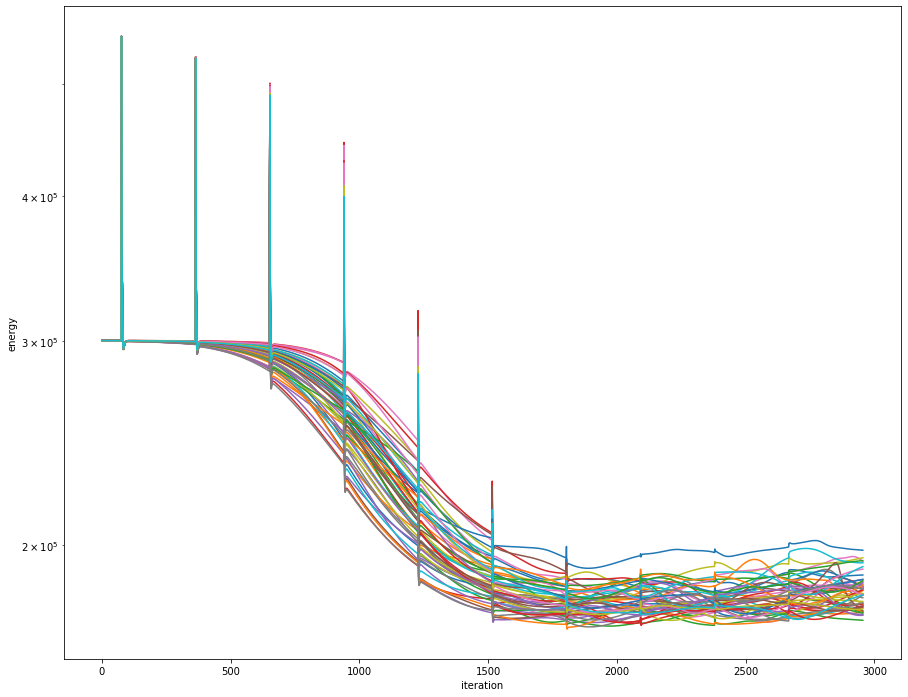

In [41]:
plt.figure(figsize=(15, 12))

for e in energy:
    plt.semilogy(e[500:])
# plt.grid(True, which='both', axis='both', )
plt.xlabel('iteration')
plt.ylabel('energy')
# plt.show()
plt.savefig('img\HNN_TSP_50.png', format='png')

## Convergence of the HNN to the minimum

<img src="img/HNN_TSP_50.png" width="1000">

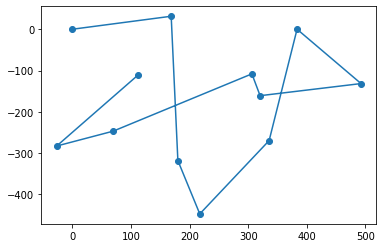

In [13]:
coordinates = np.array([
                        [0.190032e-3, -0.285946e-3],
                        [383.458,     -0.608756e-3],
                        [-27.0206,    -282.758], 
                        [335.751,     -269.577],    
                        [69.4331,     -246.780],
                        [168.521,      31.4012],
                        [320.350,     -160.900],
                        [179.933,     -318.031],    
                        [492.671,     -131.563],    
                        [112.198,     -110.561],    
                        [306.320,     -108.090],    
                        [217.343,     -447.089]
])

path = coordinates[best_route].T

plt.scatter(coordinates.T[0], coordinates.T[1])
plt.plot(path[0], path[1])
# plt.plot([path[0,-1], path[0,0]], [path[1,-1], path[1,0]])
plt.show()

## References
1. A. Lucas, "Ising formulations of many NP problems", Frontiers in Physics, vol. 2, p. 5, 2014
2. G. Joya, M. Atencia, F. Sandoval, "Hopfield Neural Networks for Optimization. Study of the different dynamics and Identification Applications"
3. Jacek Mańdziuk, "Solving the Travelling Salesman Problem with a Hopfield-type neural network", Demonstratio Mathematica 29(1):219-231, 1996